## Genenerera FP som en vektor

In [111]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage  

In [112]:
smile = ['C[C@H](O)C([O-])=O', 'CCCCC(O)C([O-])=O', 'CCCCCCC(O)C([O-])=O', 'CCCCCCC(O)C([O-])=O', 'CCCCCCCCCCCCCCC(O)C([O-])=O', 'CC(O)C(O)=O', 'CSCCC(N)C(O)=O', 'C[C@H](N)C(O)=O', 'CC[C@H](C)[C@H](N)C(O)=O', 'C[C@H](O)C([O-])=O', 'CC(C)C[C@H](N)C(O)=O', 'NCCCC[C@H](N)C(O)=O', 'CSCC[C@H](N)C(O)=O', 'N[C@@H](Cc1ccccc1)C(O)=O', 'N[C@@H](Cc1c[nH]c2ccccc12)C(O)=O', 'N[C@@H](Cc1ccc(O)cc1)C(O)=O', 'CC(C)[C@H](N)C(O)=O', 'OCC([O-])=O', '[O-]C(=O)C=O', 'N[C@@H](CCO)C(O)=O', 'CC(O)C([O-])=O']
smile_fp = {}
for i in smile:
    if type(i) == str:
        # Calculates the choosen fingerprint.
        mol=Chem.MolFromSmiles(i)
        smile_fp[i] = AllChem.GetMorganFingerprintAsBitVect(mol,5).ToBitString()
 
"""
Input: en fingerprint i bitform.
Delar upp bitsen i ett finger print och lägger in i en lista (bits), dessa uppdelade fp läggs in i en ytterligare lista kallad bit_lista. 
Denna kan användas som input sedan till PCA eller clustering. 
"""
bit_lista = []
bits = []
for value in smile_fp.values():
    for bit in value:
        bits.append(bit)
    bit_lista.append(bits)
    



## t-SNE på datan


array([[  49.881817 ,  187.17674  ],
       [-235.1698   ,  111.499985 ],
       [  20.440744 , -195.97365  ],
       [ -76.425735 ,  -13.981251 ],
       [ -15.833065 ,   85.03896  ],
       [ -37.315796 , -110.010056 ],
       [ 100.23535  ,   81.00371  ],
       [-182.18376  , -205.0757   ],
       [ 183.45723  ,   13.477882 ],
       [ -72.79118  , -250.60661  ],
       [ 193.47247  , -104.679565 ],
       [-196.23772  ,   -2.4627054],
       [-140.76357  , -101.11997  ],
       [ 128.5119   , -217.96353  ],
       [-266.37152  ,  -95.43021  ],
       [  31.330654 ,   -9.706384 ],
       [ -86.060524 ,  192.55176  ],
       [  80.456535 ,  -94.38157  ],
       [-122.39512  ,   82.92257  ]], dtype=float32)

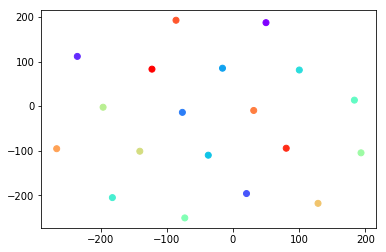

In [113]:
X = np.array(bit_lista) 
X_embedded = TSNE(n_components=2).fit_transform(X)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = cm.rainbow(np.linspace(0, 1, len(X))))
X_embedded

## Skapar en dictionary så vi kan veta vilken punk som hör till vilken smile

In [115]:
smile_data = {}
for smi,point in zip(smile,X_embedded):
    smile_data[smi] = point
    
print(smile_data)

{'C[C@H](O)C([O-])=O': array([ -72.79118, -250.60661], dtype=float32), 'CCCCC(O)C([O-])=O': array([-235.1698  ,  111.499985], dtype=float32), 'CCCCCCC(O)C([O-])=O': array([-76.425735, -13.981251], dtype=float32), 'CCCCCCCCCCCCCCC(O)C([O-])=O': array([-15.833065,  85.03896 ], dtype=float32), 'CC(O)C(O)=O': array([ -37.315796, -110.010056], dtype=float32), 'CSCCC(N)C(O)=O': array([100.23535,  81.00371], dtype=float32), 'C[C@H](N)C(O)=O': array([-182.18376, -205.0757 ], dtype=float32), 'CC[C@H](C)[C@H](N)C(O)=O': array([183.45723 ,  13.477882], dtype=float32), 'CC(C)C[C@H](N)C(O)=O': array([ 193.47247 , -104.679565], dtype=float32), 'NCCCC[C@H](N)C(O)=O': array([-196.23772  ,   -2.4627054], dtype=float32), 'CSCC[C@H](N)C(O)=O': array([-140.76357, -101.11997], dtype=float32), 'N[C@@H](Cc1ccccc1)C(O)=O': array([ 128.5119 , -217.96353], dtype=float32), 'N[C@@H](Cc1c[nH]c2ccccc12)C(O)=O': array([-266.37152,  -95.43021], dtype=float32), 'N[C@@H](Cc1ccc(O)cc1)C(O)=O': array([31.330654, -9.70638

## Clustra med K-means

[0 0 2 0 0 2 1 2 1 2 1 0 2 1 2 1 0 1 0]


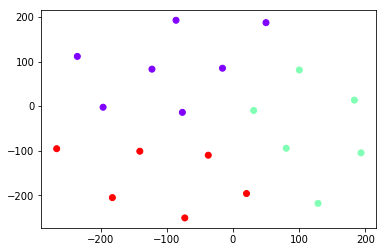

In [116]:
#Behöver ha en metod för att räkna ut det optimala antalet kluster om denna ska användas: exempel elbow

data= X_embedded
X = np.array(data)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)


plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow', label = smile)  
display()

print(kmeans.labels_)


## Clustering with Agglomerative Clustering Algorithm

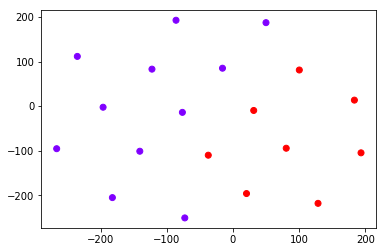

In [117]:
#Osäker på om denna är bra.. kanske måste plottas som ett träd typ men vet inte hur i så fall

data= X_embedded
X = np.array(data)
clustering = AgglomerativeClustering().fit(X)

clustering.labels_
plt.scatter(X[:,0],X[:,1], c=clustering.labels_, cmap='rainbow')
display()

## Träd

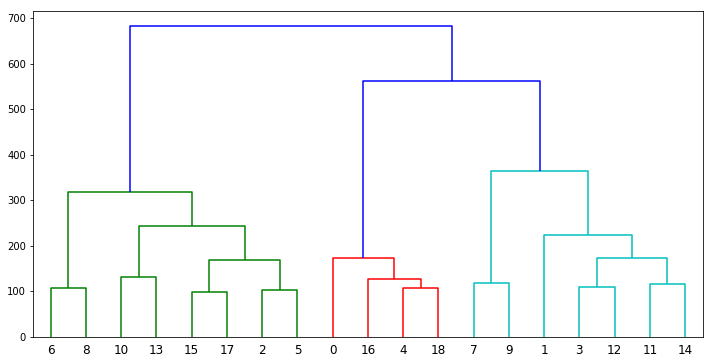

In [118]:
data= X_embedded
X = np.array(data)

# https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
linked = linkage(X, 'ward')

labelList = range(0, len(X))

plt.figure(figsize=(12, 6))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='ascending',
            show_leaf_counts=True)
display()

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)


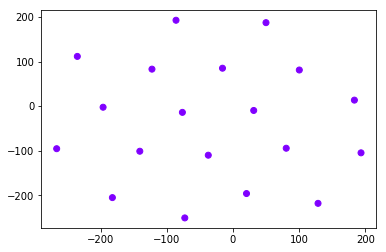

In [119]:
#DBSCAN men verkar inte fungera på vårt data set, alla hamnar i samma eller helt olika beroende på hur man klustrar

from sklearn.cluster import DBSCAN

X = np.array(X_embedded)
clustering = DBSCAN( eps=3, min_samples=2).fit(X)
print(clustering.labels_)
print(clustering) 

plt.scatter(X[:,0],X[:,1], c=clustering.labels_, cmap='rainbow')
display()